In [1]:
import sccoda

In [1]:
# Setup
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

import sccoda.datasets as scd

2024-08-30 14:45:41.808302: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-30 14:45:41.923545: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-30 14:45:41.983815: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-30 14:45:41.999969: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-30 14:45:42.098321: I tensorflow/core/platform/cpu_feature_guar

In [2]:
cell_counts = scd.haber()

FileNotFoundError: [Errno 2] No such file or directory: '/home/csierra/opt/csierra/venv-gcc/lib/python3.10/site-packages/sccoda/datasets/haber_counts.csv'

cellcomp=pd.read_csv("C:/Users/cesar/OneDrive - CRG - Centre de Regulacio Genomica/Collaborations/Alvaro/Alvaro snRNAseq/Clara_Dierssen/inprogress/glia_cell_composition.csv", header=y)

In [4]:
cellcomp=pd.read_csv("cell_composition.csv", header=0)
cellcomp

,L6 CT CTX,L6 IT CTX,L5/6 NP CTX,L4/5 IT CTX,L2/3 IT CTX,L5 PT CTX,L5 IT CTX,L6b CTX,Vip,Pvalb,...,Micro-PVM,Oligo,Astro,CR,SMC-Peri,VLMC,Endo,oligop,DAM,Var1
0,661,361,192,417,902,408,433,51,86,220,...,280,553,41,3,4,5,0,118,241,AD_GFP1
1,183,86,59,192,271,72,128,5,64,95,...,753,488,46,5,12,1,45,112,163,AD_GFP2
2,175,82,79,161,233,62,100,12,67,97,...,252,398,34,2,10,4,4,94,234,AD_GFP3
3,408,191,176,368,471,182,302,35,108,179,...,812,681,29,8,11,1,17,122,392,AD_OSK1
4,235,103,68,207,219,49,114,11,51,75,...,266,563,22,4,6,0,4,99,211,AD_OSK2
5,190,104,74,262,338,65,133,10,69,112,...,610,499,34,2,9,4,6,122,199,AD_OSK3
6,286,112,115,236,281,106,156,23,103,102,...,311,768,67,23,13,5,1,139,212,AD_OSK4
7,468,284,194,636,879,380,627,26,104,212,...,242,388,33,8,1,1,1,73,0,CON_GFP1
8,210,126,76,232,374,86,163,11,70,111,...,359,472,136,2,8,2,7,105,2,CON_GFP2
9,220,131,121,239,325,118,170,11,103,114,...,243,646,144,14,10,1,2,132,4,CON_GFP3


In [5]:
#Convert data to anndata object
data_all = dat.from_pandas(cellcomp, covariate_columns=["Var1"])
# Extract condition from mouse name and add it as an extra column to the covariates
condition=data_all.obs["Var1"].str.replace(r"_[0-9]", "", regex=True)
condition2=condition.str.replace(r"[0-9]", "", regex=True)
condition2
data_all.obs["Condition"] = condition2
print(data_all)

AnnData object with n_obs × n_vars = 10 × 22
    obs: 'Var1', 'Condition'


In [6]:
data_all.to_df()

,L6 CT CTX,L6 IT CTX,L5/6 NP CTX,L4/5 IT CTX,L2/3 IT CTX,L5 PT CTX,L5 IT CTX,L6b CTX,Vip,Pvalb,...,Sncg,Micro-PVM,Oligo,Astro,CR,SMC-Peri,VLMC,Endo,oligop,DAM
0,661,361,192,417,902,408,433,51,86,220,...,34,280,553,41,3,4,5,0,118,241
1,183,86,59,192,271,72,128,5,64,95,...,17,753,488,46,5,12,1,45,112,163
2,175,82,79,161,233,62,100,12,67,97,...,22,252,398,34,2,10,4,4,94,234
3,408,191,176,368,471,182,302,35,108,179,...,24,812,681,29,8,11,1,17,122,392
4,235,103,68,207,219,49,114,11,51,75,...,22,266,563,22,4,6,0,4,99,211
5,190,104,74,262,338,65,133,10,69,112,...,28,610,499,34,2,9,4,6,122,199
6,286,112,115,236,281,106,156,23,103,102,...,67,311,768,67,23,13,5,1,139,212
7,468,284,194,636,879,380,627,26,104,212,...,44,242,388,33,8,1,1,1,73,0
8,210,126,76,232,374,86,163,11,70,111,...,23,359,472,136,2,8,2,7,105,2
9,220,131,121,239,325,118,170,11,103,114,...,35,243,646,144,14,10,1,2,132,4


<Axes: xlabel='Cell type', ylabel='Proportion'>

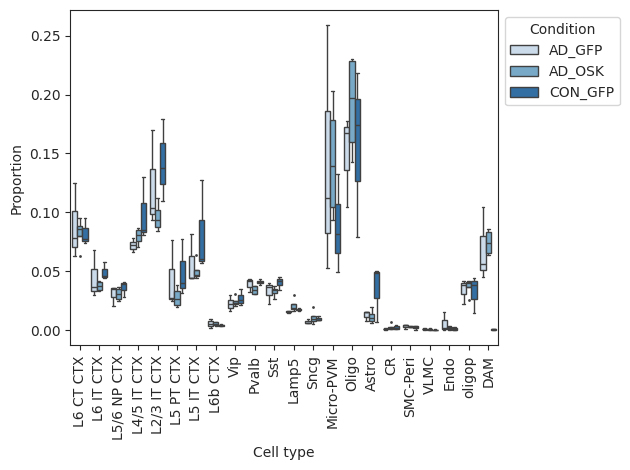

In [7]:
viz.boxplots(data_all, feature_name="Condition")

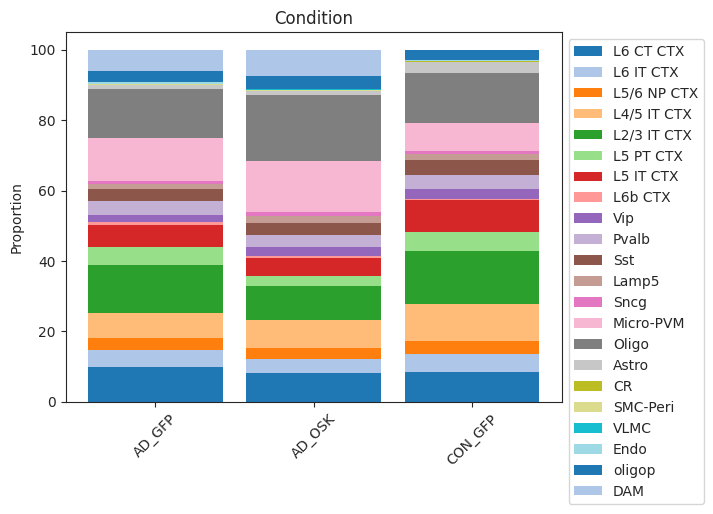

In [8]:
# Stacked barplot for the levels of "Condition"
ax=viz.stacked_barplot(data_all, feature_name="Condition")
# Get the figure from the AxesSubplot
fig = ax.get_figure()

# Save the plot as a PDF file
fig.savefig("composition.pdf")

In [9]:
model_data_all = mod.CompositionalAnalysis(data_all, formula="Condition", reference_cell_type="oligop")

Zero counts encountered in data! Added a pseudocount of 0.5.


In [10]:
# Run MCMC
sim_results = model_data_all.sample_hmc()

  0%|                                                                                                         | 0/20000 [00:00<?, ?it/s]WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
I0000 00:00:1725022091.628656 2302551 service.cc:146] XLA service 0x7fe10c007b30 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725022091.628892 2302551 service.cc:154]   StreamExecutor device (0): Host, Default Version
2024-08-30 14:48:11.726359: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1725022092.400100 2302551 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
100%|████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:50<00:00, 399.09it/s]


MCMC sampling finished. (64.377 sec)
Acceptance rate: 55.3%


In [11]:
sim_results.summary()
print(sim_results.credible_effects())
#Only DAM is different

Compositional Analysis summary:

Data: 10 samples, 22 cell types
Reference index: 20
Formula: Condition

Intercepts:
             Final Parameter  Expected Sample
Cell Type                                    
L6 CT CTX              2.753       287.868052
L6 IT CTX              2.100       149.830135
L5/6 NP CTX            1.836       115.065579
L4/5 IT CTX            2.716       277.411571
L2/3 IT CTX            3.081       399.615255
L5 PT CTX              1.931       126.532883
L5 IT CTX              2.401       202.451878
L6b CTX                0.264        23.891010
Vip                    1.573        88.455732
Pvalb                  1.990       134.222950
Sst                    1.911       124.027364
Lamp5                  1.318        68.545806
Sncg                   0.690        36.580021
Micro-PVM              3.168       435.938955
Oligo                  3.365       530.862064
Astro                  1.071        53.543918
CR                    -0.476        11.398733
SMC-Peri 